## Examples of how to do the following in Julia
1. Matrix / vector creation, slicing, manipulation
2. Plotting 
3. Use and create functions
4. Conditional statements (for, if, while, etc)
5. Logical indexing
6. Linear regression
7. Non-linear regression


### 1. Matrix / vector creation, slicing, manipulation

In [1]:
# Random 100 X 10 Matrix 
A = rand(100,10); 
size(A)

(100,10)

In [2]:
# Random 10 X 1 vector 
b = rand(10,1); 
size(b)

(10,1)

In [3]:
# get the first 10 elements of b
b[1:10,1]

10-element Array{Float64,1}:
 0.150018 
 0.92865  
 0.972539 
 0.416073 
 0.860206 
 0.248871 
 0.105828 
 0.0181976
 0.803741 
 0.916234 

In [4]:
# transpose the first 10 elements of b
b[1:10,1]'

1×10 Array{Float64,2}:
 0.150018  0.92865  0.972539  0.416073  …  0.0181976  0.803741  0.916234

In [5]:
# matrix multiplication
y = A * b;
size(y)

(100,1)

### 2. Plotting

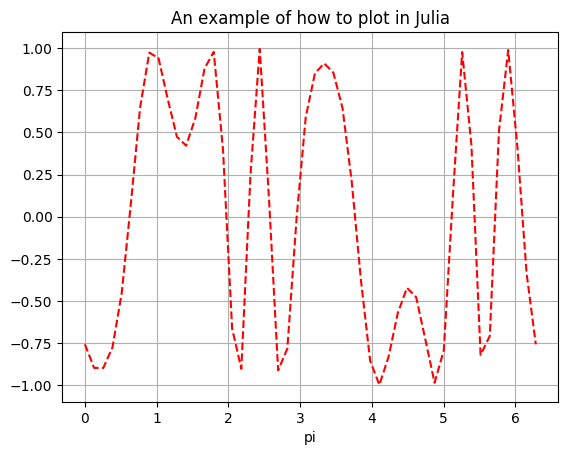

In [6]:
using PyPlot

# define variables
x = linspace(0,2*pi,50);
y = sin(3*x + 4*cos(2*x));

# plot
plot(x, y, "r--")
# make it pretty
title("An example of how to plot in Julia")
grid("on")
xlabel("pi")

### 3. Use and create functions

In [ ]:
f(x,y) = x^2 + y^2


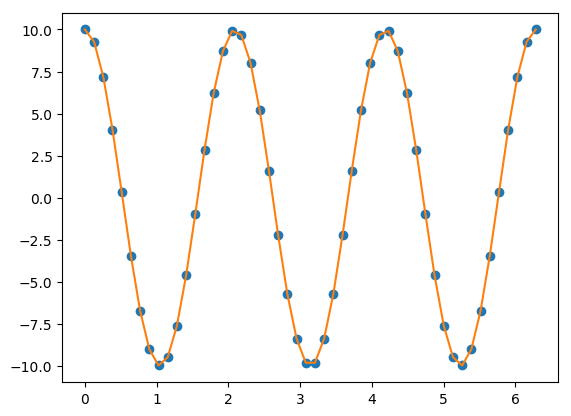

In [7]:
# inline
my_function(xdata, scale) = scale * cos(3*xdata);

# matlab style
function my_function_long(xdata, scale)
    return scale * cos(3*xdata)
end
#plot 
plot(x, my_function(x, 10), "o");
plot(x, my_function_long(x, 10), "-");

### 4. Conditional statements (for, if, while, etc)

In [8]:
numbers = randn( 10 )

# note that you can use an iterator !!!
for num in numbers
    if num < 0
        print("< 0")

    end
end

< 0< 0< 0< 0

In [9]:
# same loop witout an iterator
for i = 1:size(numbers)[1]
    num = numbers[i]
        if num < 0
        print("< 0")
        end
end

< 0< 0< 0< 0

## 5. Logical indexing ( very different than Python and Matlan)

In [10]:
numbers < 0

LoadError: MethodError: no method matching isless(::Array{Float64,1}, ::Int64)[0m
Closest candidates are:
  isless([1m[31m::Char[0m, ::Integer) at deprecated.jl:49
  isless([1m[31m::AbstractFloat[0m, ::Real) at operators.jl:42
  isless([1m[31m::Real[0m, ::Real) at operators.jl:75[0m

In [11]:
numbers[1] < 0

false

In [12]:
# MAP method
# 1. create function
f(n) = isless(n,0)
# 2. map (functional programming style)
filter = map(f,numbers)

10-element Array{Bool,1}:
 false
 false
  true
 false
  true
  true
 false
 false
 false
  true

In [13]:
# VECTORIZE method
numbers .< 0

10-element BitArray{1}:
 false
 false
  true
 false
  true
  true
 false
 false
 false
  true

In [14]:
# use the boolean operators
numbers[numbers .< 0]

4-element Array{Float64,1}:
 -0.227248
 -1.44514 
 -0.626294
 -2.9092  

## 6. Linear regression  $$ y = m*x + b $$

The real slope is 3.3, and the predicted slope is 3.27


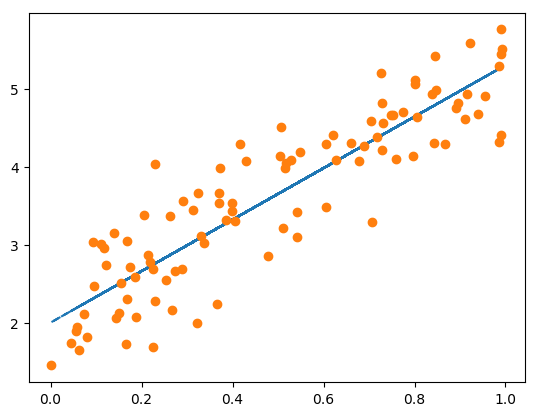

The real intercept is 2, and the predicted slope is 2.02


In [15]:
# Linear Algebra style
# For single linear regresion y= mx + b
m = 3.3; b = 2; x = rand(100,1)
y = m * x + b
# add noise
yn= y + randn(size(y)) * 0.5

# plot
plot(x,y,"--")
plot(x,yn,"o")

# regression
X = zeros(100,2); X[:,1] = x;  X[:,2] = 1.0
coeff_pred = X\yn
slope =  round(coeff_pred[1], 2)
intercept = round(coeff_pred[2], 2)
println("The real slope is $m, and the predicted slope is $slope")
println("The real intercept is $b, and the predicted slope is $intercept")

## 7. Non-linear regression $$ y = Mz * e^{ (x / T_2 )} $$


[1

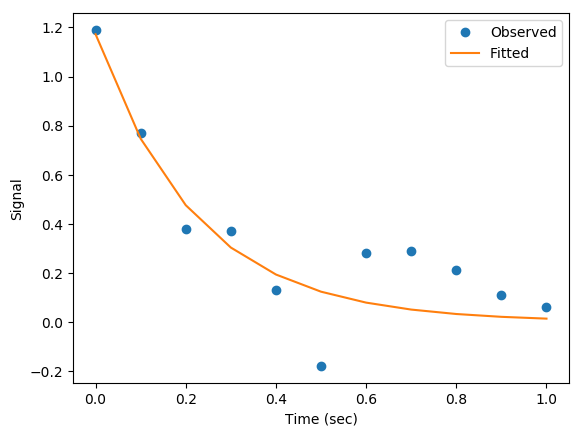

.17231,0.221528]

In [16]:
using LsqFit

# "collect" some data
xdata = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
ydata= [1.19, 0.77, 0.38,  0.37,  0.13, -0.18,  0.28,  0.29,  0.21,  0.11,  0.06]

function fit_t2_exp(x,y, initial_guess)
    # define a model to which you want to fit the data
    t2decay(x_, p) = p[1]*exp(-x_/p[2])
    # fit
    fit = curve_fit(t2decay, x, y, initial_guess);
    parameters = fit.param
    errors = estimate_errors(fit, 0.95);
    
    plot(x,y,"o"); plot(x, t2decay(x, parameters))
    legend(["Observed","Fitted"])
    xlabel("Time (sec)")
    ylabel("Signal")
    return parameters, errors
end

p0 = [1., 0.25] # define an initial guess
fitted_pars, errors = fit_t2_exp(xdata,ydata, p0); #fit the data
print(fitted_pars)